In [7]:
# Quiet my warnings for the sake of the lesson:
import warnings
warnings.filterwarnings("ignore")

# Tabular data friends:
import pandas as pd
import numpy as np

# Data viz:
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn stuff:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics

# Data acquisition
from pydataset import data

import acquire

In [8]:
df = acquire.get_titanic_data()
df.head(3)

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1


In [ ]:
df = df.drop(columns= 'Unnamed: 0')

In [12]:
df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1


In [47]:
df.dropna(inplace=True)

In [16]:
def split_data(df,target):
    '''
    This function will:
    - take in a given DataFrame  
    - stratify on target (formatted as a "string")
    return train, validate, test DataFrames.
    '''
    # 20/80 test/train_validate
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[target])
    
    # 30/70 validate/train of the 80%
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate[target])
    return train, validate, test


In [48]:
train, validate, test = split_data(df, 'survived')
train.shape, validate.shape, test.shape

((101, 13), (44, 13), (37, 13))

In [49]:
# create X & y version of train/validate/test
# where X contains the features we want to use and y is a series with just the target variable

x_train = train.drop(columns=df.columns.difference(['age','fare']))
y_train = train.survived

x_validate = validate.drop(columns=df.columns.difference(['age','fare']))
y_validate = validate.survived

x_test = test.drop(columns=df.columns.difference(['age','fare']))
y_test = test.survived

In [50]:
x_train.head()

,age,fare
429,32.0,8.0500
679,36.0,512.3292
118,24.0,247.5208
435,14.0,120.0000
782,29.0,30.0000


In [51]:

print(f"""train:
{train.columns.to_list()} 
_____________________________________________
X_train:
{x_train.columns.to_list()}
_____________________________________________
X_validate:
{x_validate.columns.to_list()}
""")

train:
['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'deck', 'embark_town', 'alone'] 
_____________________________________________
X_train:
['age', 'fare']
_____________________________________________
X_validate:
['age', 'fare']



In [52]:
x_train.dropna(inplace=True)
x_train.shape
x_train.head()

,age,fare
429,32.0,8.0500
679,36.0,512.3292
118,24.0,247.5208
435,14.0,120.0000
782,29.0,30.0000


In [53]:
y_train.dropna(inplace=True)
y_train.head()

429    1
679    1
118    0
435    1
782    0
Name: survived, dtype: int64

In [65]:
#iteration:
model_set = []
model_accuracies = {}

for i in range(1,21):
    #MAKE THE THING
    knn = KNeighborsClassifier(n_neighbors=i)
    #FIT THE THING
    knn.fit(x_train, y_train)
    
    model_set.append(knn)
    model_accuracies[f'{i}_neighbors'] = {
        'k': int(i),
        'train_score':round(knn.score(x_train, y_train),2),
        'validate_score':round(knn.score(x_validate, y_validate),2)}

In [59]:
model_set

[KNeighborsClassifier(n_neighbors=1),
 KNeighborsClassifier(n_neighbors=2),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=4),
 KNeighborsClassifier(),
 KNeighborsClassifier(n_neighbors=6),
 KNeighborsClassifier(n_neighbors=7),
 KNeighborsClassifier(n_neighbors=8),
 KNeighborsClassifier(n_neighbors=9),
 KNeighborsClassifier(n_neighbors=10),
 KNeighborsClassifier(n_neighbors=11),
 KNeighborsClassifier(n_neighbors=12),
 KNeighborsClassifier(n_neighbors=13),
 KNeighborsClassifier(n_neighbors=14),
 KNeighborsClassifier(n_neighbors=15),
 KNeighborsClassifier(n_neighbors=16),
 KNeighborsClassifier(n_neighbors=17),
 KNeighborsClassifier(n_neighbors=18),
 KNeighborsClassifier(n_neighbors=19),
 KNeighborsClassifier(n_neighbors=20)]

In [66]:
model_accuracies

{'1_neighbors': {'k': 1, 'train_score': 1.0, 'validate_score': 0.55},
 '2_neighbors': {'k': 2, 'train_score': 0.74, 'validate_score': 0.45},
 '3_neighbors': {'k': 3, 'train_score': 0.79, 'validate_score': 0.64},
 '4_neighbors': {'k': 4, 'train_score': 0.73, 'validate_score': 0.52},
 '5_neighbors': {'k': 5, 'train_score': 0.73, 'validate_score': 0.64},
 '6_neighbors': {'k': 6, 'train_score': 0.73, 'validate_score': 0.66},
 '7_neighbors': {'k': 7, 'train_score': 0.7, 'validate_score': 0.66},
 '8_neighbors': {'k': 8, 'train_score': 0.73, 'validate_score': 0.61},
 '9_neighbors': {'k': 9, 'train_score': 0.71, 'validate_score': 0.66},
 '10_neighbors': {'k': 10, 'train_score': 0.73, 'validate_score': 0.66},
 '11_neighbors': {'k': 11, 'train_score': 0.72, 'validate_score': 0.68},
 '12_neighbors': {'k': 12, 'train_score': 0.69, 'validate_score': 0.68},
 '13_neighbors': {'k': 13, 'train_score': 0.69, 'validate_score': 0.68},
 '14_neighbors': {'k': 14, 'train_score': 0.68, 'validate_score': 0.68}

In [70]:
mod_acc = pd.DataFrame(model_accuracies).T
mod_acc.head()

,k,train_score,validate_score
1_neighbors,1.0,1.00,0.55
2_neighbors,2.0,0.74,0.45
3_neighbors,3.0,0.79,0.64
4_neighbors,4.0,0.73,0.52
5_neighbors,5.0,0.73,0.64


In [75]:
plot_df = mod_acc.drop(columns='k')
plot_df

,train_score,validate_score
1_neighbors,1.00,0.55
2_neighbors,0.74,0.45
3_neighbors,0.79,0.64
4_neighbors,0.73,0.52
5_neighbors,0.73,0.64
6_neighbors,0.73,0.66
7_neighbors,0.70,0.66
8_neighbors,0.73,0.61
9_neighbors,0.71,0.66
10_neighbors,0.73,0.66


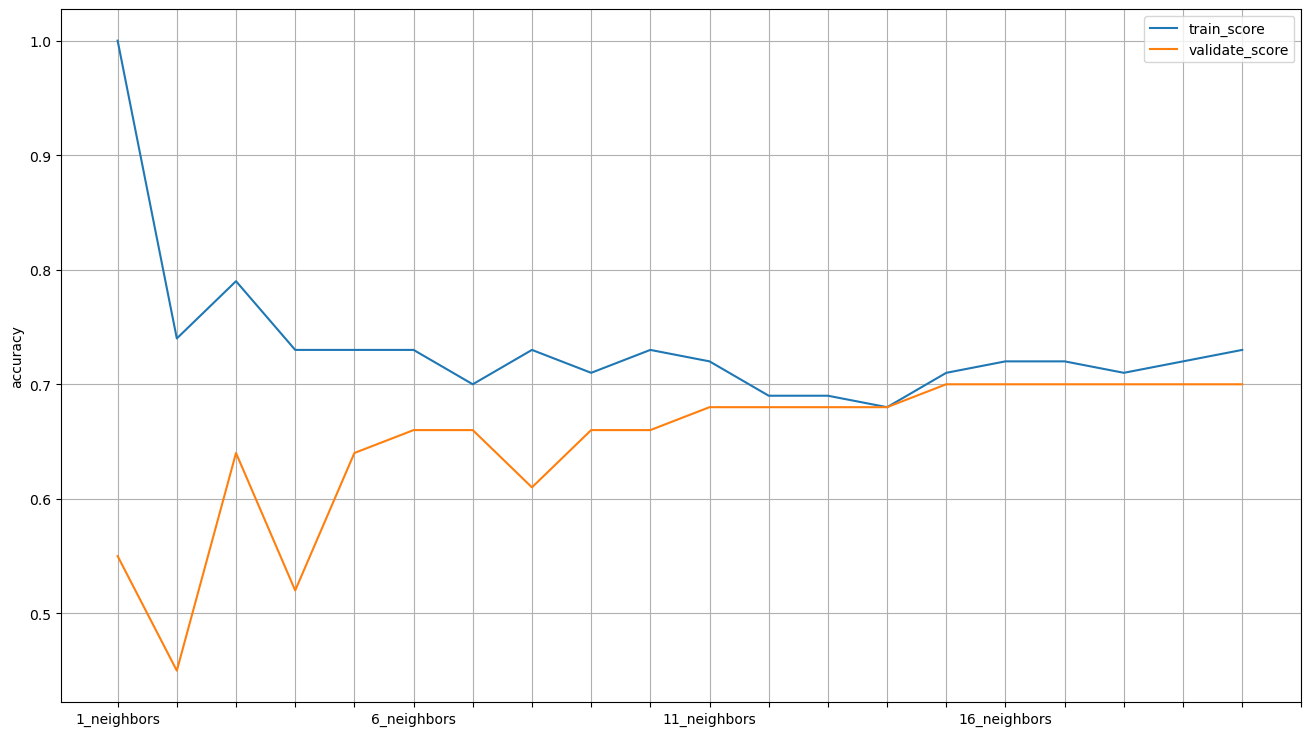

In [73]:
plot_df.plot(figsize=(16,9))
plt.ylabel('accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()
plt.show()

### Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [78]:
model_set = []
model_accuracies = {}

knn5 = KNeighborsClassifier(n_neighbors=5)

knn5.fit(x_train, y_train)
    
model_set.append(knn5)
model_accuracies[f'5_neighbors'] = {
    'train_score':round(knn.score(x_train, y_train), 2),
    'validate_score':round(knn.score(x_validate, y_validate), 2)}

### Evaluate your results using the model score, confusion matrix, and classification report.

In [79]:
model_set

[KNeighborsClassifier()]

### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

### Run through steps 1-3 setting k to 10

### Run through steps 1-3 setting k to 20

### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

### Which model performs best on our out-of-sample data from validate?